In [2]:
import pysam
import scanpy as sc
from anndata import AnnData

In [4]:
import matplotlib.pyplot as plt
import subprocess
import seaborn as sns
import numpy as np
import pandas as pd
import os
from scipy.sparse import csr_matrix
from tqdm import tqdm
#from matplotlib_scalebar.scalebar import ScaleBar
from datetime import datetime

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 1000)

In [26]:
def sort_cnt(arr):
    npcnt=np.array(np.unique(arr,return_counts=True)).T
    dfcnt=pd.DataFrame(npcnt)
    dfcnt[1]=dfcnt[1].astype('int')
    dfcnt=dfcnt.sort_values(by=1,ascending=False)
    return dfcnt

def mtx_adata(slideseq,i,save=True):
    folds=sorted(os.listdir(slideseq))
    print(folds[i]);fold=folds[i];date = fold.split('_')[0];puck = fold.split(date+'_')[1]
    folds=os.listdir(slideseq) #list subfolders in a head folder of samples, the mtx features barcodes and xy files all should in the same subfolder
    adata = sc.read_mtx(f'{slideseq}/{fold}/{puck}.matched.digital_expression_matrix.mtx.gz')# load in counts matrix
    adata = adata.T
    adata.var = pd.read_table(f'{slideseq}/{fold}/{puck}.matched.digital_expression_features.tsv.gz', 
                              names=['ensembl','gene'], index_col=1)# load in gene names/ids table
    barcode_xy = pd.read_table(f'{slideseq}/{fold}/barcode_matching/{puck}_barcode_xy.txt.gz',names=['x','y'], index_col=0)# load in bead barcodes>location table
    barcodes = pd.read_table(f'{slideseq}/{fold}/{puck}.matched.digital_expression_barcodes.tsv.gz', 
                             names=['barcode'], index_col=0)# load in bead barcodes list
    adata.obs=barcodes.merge(barcode_xy,left_index=True,right_index=True)
    adata.obsm['spatial']=adata.obs.values
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=True,inplace=True)
    if save:
        adata.write_h5ad(f'{slideseq}/{fold}/adata_{puck}_raw.h5ad')
    return adata


In [16]:
slideseq = '/n/scratch3/users/m/meb521/slide-seq_Eren/'

In [17]:
folds=sorted(os.listdir(slideseq))

In [18]:
i=0

In [22]:
for i in range(len(folds)):
    print('index',i)
    folds=sorted(os.listdir(slideseq))
    print(folds[i]);fold=folds[i];date = fold.split('_')[0];puck = fold.split(date+'_')[1]
    folds=os.listdir(slideseq) #list subfolders in a head folder of samples, the mtx features barcodes and xy files all should in the same subfolder
    

index 0
2023-02-24_Puck_221101_11
index 1
2023-02-24_Puck_221116_02
index 2
2023-02-24_Puck_221116_03
index 3
2023-02-24_Puck_221116_04
index 4
2023-02-24_Puck_221116_07
index 5
2023-02-24_Puck_221116_13
index 6
2023-02-24_Puck_221116_14
index 7
2023-02-24_Puck_221116_17
index 8
2023-02-24_Puck_221116_18
index 9
2023-02-24_Puck_221116_19
index 10
2023-02-24_Puck_221116_27
index 11
2023-02-24_Puck_221118_04
index 12
2023-02-24_Puck_221118_30
index 13
2023-02-24_Puck_221118_32
index 14
2023-02-24_Puck_221118_36
index 15
2023-02-24_Puck_221130_06
index 16
2023-02-24_Puck_221130_07
index 17
2023-02-24_Puck_221130_08
index 18
2023-02-24_Puck_221130_09
index 19
2023-02-24_Puck_221130_10
index 20
2023-02-24_Puck_221130_11
index 21
2023-02-24_Puck_221130_12
index 22
2023-02-24_Puck_221130_13
index 23
2023-02-24_Puck_221130_15
index 24
2023-02-24_Puck_221130_16
index 25
2023-02-24_Puck_221130_17
index 26
2023-02-24_Puck_221130_18
index 27
2023-02-24_Puck_221130_19
index 28
2023-02-24_Puck_22113

In [35]:
i=16

In [36]:
folds=sorted(os.listdir(slideseq))
print(folds[i]);fold=folds[i];date = fold.split('_')[0];puck = fold.split(date+'_')[1]

2023-02-24_Puck_221130_07


In [38]:
fold,date

('2023-02-24_Puck_221130_07', '2023-02-24')

In [27]:
mtx_adata(slideseq,i,save=True)

2023-02-24_Puck_221130_07


AnnData object with n_obs × n_vars = 38790 × 21724
    obs: 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'ensembl', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

In [28]:
ref_fasta='/home/meb521/align_unmapped/refs/GCF_000865725.1_ViralMultiSegProj15521_genomic.fna'
genome_dir='/home/meb521/refs/flu/'

In [30]:
#chmod +x -R scripts/

In [32]:
subprocess.call([ '/home/meb521/align_unmapped/scripts/STAR_ref.sh', ref_fasta, genome_dir])

/home/meb521/align_unmapped/refs/GCF_000865725.1_ViralMultiSegProj15521_genomic.fna
/home/meb521/refs/flu/
	STAR --runMode genomeGenerate --runThreadN 16 --genomeSAindexNbases 5 --genomeDir /home/meb521/refs/flu/ --genomeFastaFiles /home/meb521/align_unmapped/refs/GCF_000865725.1_ViralMultiSegProj15521_genomic.fna
	STAR version: 2.7.10a   compiled: 2022-05-07T11:42:06-0400 login03.o2.rc.hms.harvard.edu:/home/meb521/STAR-2.7.10a/source
Nov 17 15:46:19 ..... started STAR run
Nov 17 15:46:19 ... starting to generate Genome files
Nov 17 15:46:19 ... starting to sort Suffix Array. This may take a long time...
Nov 17 15:46:19 ... sorting Suffix Array chunks and saving them to disk...
Nov 17 15:46:19 ... loading chunks from disk, packing SA...
Nov 17 15:46:19 ... finished generating suffix array
Nov 17 15:46:19 ... generating Suffix Array index
Nov 17 15:46:19 ... completed Suffix Array index
Nov 17 15:46:19 ... writing Genome to disk ...
Nov 17 15:46:19 ... writing Suffix Array to disk ...
N

0

In [42]:
bam_file = f'{slideseq}{fold}/{puck}.matched'

In [43]:
bam_file

'/n/scratch3/users/m/meb521/slide-seq_Eren/2023-02-24_Puck_221130_07/Puck_221130_07.matched'

In [36]:
#bam_dir='/n/data2/dfci/medonc/cwu/meb521/slideseq/zebra/2022-03-11_Puck_220128_36/Puck_220128_36.matched_unmapped.fastq.gz'

In [47]:
# pigz is needed to be in path, or comment it out in the script

In [44]:
subprocess.call([ 'sbatch','/home/meb521/align_unmapped/scripts/matchbam2fq.sh', bam_file])

Submitted batch job 22781472


0

In [50]:
#genome_dir=$1
input_fastq = f'{bam_file}_unmapped.fastq.gz'
out_name = f'{bam_file}_flu_mapped'

In [51]:
input_fastq

'/n/scratch3/users/m/meb521/slide-seq_Eren/2023-02-24_Puck_221130_07/Puck_221130_07.matched_unmapped.fastq.gz'

In [52]:
subprocess.call([ 'sbatch','/home/meb521/align_unmapped/scripts/STAR_align.sh', genome_dir,input_fastq, out_name])

Submitted batch job 22782444


0

In [55]:
f_map = f'{out_name}_pri.bam'

In [56]:
samfile = pysam.AlignmentFile(f_map, 'r' ,threads=4,check_sq=False)
flags=[];reads={};i=0;save=False;extract=True

if save:
    f_name=f_map.split('.bam')[0]+'_extract.fastq'
    f= open(f_name, 'w')
    
for read in samfile.fetch():
    i+=1
    AS=read.get_tag('AS');mapq=read.mapping_quality
    if AS>25:#20*'A' not in read.seq:# and mapq==60:
        ref=read.reference_name
        #if ref=='4324143':
        #    print(f'>{read.qname}','\n',read.seq)
        if save:
            qstrt=read.query_alignment_start;qend=read.query_alignment_end
            newnamef=f'{read.qname}_{qstrt}_{qend}_{read.flag}_{ref}'
            if extract:
                sub_seq=read.seq[qstrt:qend]
                sub_qual=read.qual[qstrt:qend]
                f.write(f'@{newnamef}\n')
                f.write(f'{sub_seq}\n')
                f.write('+\n')
                f.write(f'{sub_qual}\n')
            else:
                f.write(f'@{newnamef}\n')
                f.write(f'{read.seq}\n')
                f.write('+\n')
                f.write(f'{read.qual}\n')
            
        reads[read.qname]=ref
        flags.append([ref,read.rlen,read.qlen,AS,read.reference_start,mapq,read.flag])
        
    if i>20000000: break
if save:
    f.close()
    subprocess.call([ 'pigz', '-f', f_name ])

In [58]:
len(flags)

240688

In [62]:
trns=[f[0] for f in flags]
stats=[f[1:] for f in flags]
stats=pd.DataFrame(np.array(stats))
align_reads_stats=pd.DataFrame(np.array(flags))
cnt_trns=sort_cnt(trns)
#cnt_trns['species']=cnt_trns[0].apply(lambda x: map_names[x])
#cnt_trns['species']=cnt_trns[0].apply(lambda x: seq_to_name[x])

In [64]:
align_reads_stats.columns=['fasta_entry','r_len','q_len','AS','ref_start','mapq','flag']

In [66]:
align_reads_stats.to_csv(f'{slideseq}{fold}/{puck}_align_reads_stats.csv')

In [60]:
cnt_trns

,0,1
3,NC_002019.1,81199
1,NC_002017.1,54232
7,NC_002023.1,24871
4,NC_002020.1,24047
6,NC_002022.1,20296
5,NC_002021.1,19616
0,NC_002016.1,12365
2,NC_002018.1,4062


In [69]:
align_reads_stats[align_reads_stats.fasta_entry=='NC_002019.1'].ref_start

,fasta_entry,r_len,q_len,AS,ref_start,mapq,flag
0,NC_002023.1,41,41,38,0,255,0
1,NC_002023.1,41,32,31,0,255,0
2,NC_002023.1,41,32,31,0,255,0
3,NC_002023.1,41,32,31,0,255,0
4,NC_002023.1,41,37,32,0,255,0
...,...,...,...,...,...,...,...
240683,NC_002020.1,35,35,30,833,255,0
240684,NC_002020.1,35,35,30,833,255,0
240685,NC_002020.1,35,35,30,833,255,0
240686,NC_002020.1,35,35,30,833,255,0


In [74]:
align_reads_stats.ref_start=align_reads_stats.ref_start.astype('int')

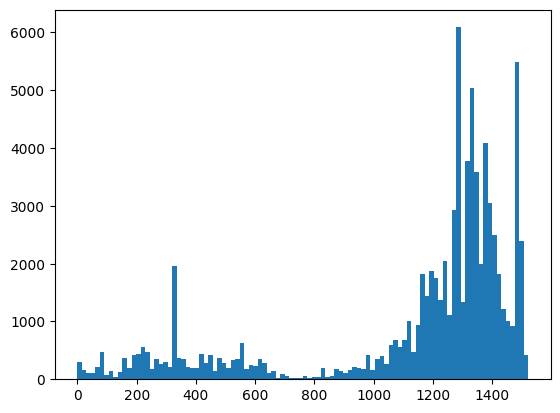

In [75]:
#arr=np.array([l for l in stats[3] if l >0 and l<30000])
#print(len(arr))
plt.hist(align_reads_stats[align_reads_stats.fasta_entry=='NC_002019.1'].ref_start,bins=100);

In [76]:
folds=sorted(os.listdir(slideseq))

In [77]:
adata=sc.read(f'{slideseq}/{fold}/adata_{puck}_raw.h5ad')
f_match=f'{slideseq}/{fold}/{puck}.matched_unmapped.bam'

[<AxesSubplot:title={'center':'total_counts'}, xlabel='spatial1', ylabel='spatial2'>]

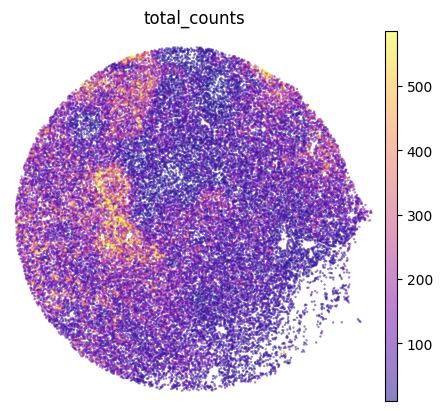

In [80]:
sc.pl.spatial(adata,color='total_counts',show=False,
                  spot_size=30,frameon=False,vmax='p99.3',
                  crop_coord=[300,5000,5000,300],alpha=.5,cmap='plasma')

In [81]:
bcs=[];trans=[];bac_dic={}
samfile = pysam.AlignmentFile(f_match, 'rb', check_sq=False)
for read in tqdm(samfile.fetch(until_eof=True)):
    if reads.get(read.qname) is not None:
        #BC=read.get_tag('XC')+'-1'#.split('-')[0]
        BC=read.get_tag('XB')#.split('-')[0]
        UMI=read.get_tag('XM')
        trans.append(reads[read.qname])
        bcs.append(BC)
        try:
            bac_dic[reads[read.qname]].append([BC,UMI])
        except:
            bac_dic[reads[read.qname]]=[[BC,UMI]]
    

8264309it [00:15, 530240.63it/s]


In [82]:
bcs_uni=np.unique(bcs)

print(bcs_uni.shape)

trans_uni=np.unique(trans)

(14974,)


In [83]:
len(set(adata.obs.index) & set(bcs_uni))

14974

### make adata

In [90]:
bac_np = np.zeros( (len(bcs_uni),len(trans_uni)) )
bac_df = pd.DataFrame(bac_np, index=bcs_uni, columns=trans_uni)

for bac in trans_uni:
    uniques = np.unique(bac_dic[bac], axis=0) # all unique pairs of bc and umi
    if len(uniques)>0:
        bcs, cnts = np.unique(uniques[:,0], return_counts=True) # all barcodes
        for i in range(len(cnts)):
            if cnts[i]>0:
                bac_df.at[bcs[i],bac]+=cnts[i]

bac_df=AnnData(bac_df)
bac_df.X = csr_matrix(bac_df.X)
sc.pp.filter_genes(bac_df, min_counts=1)
sc.pp.filter_cells(bac_df, min_counts=1)
sc.pp.calculate_qc_metrics(bac_df, percent_top=None, log1p=None, inplace=True)

/home/meb521/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  if sys.path[0] == "":


In [91]:
bac_df.obs=pd.merge(bac_df.obs,adata.obs[['x','y']],how='left',left_index=True,right_index=True)
bac_df.obsm['spatial']=bac_df.obs[['x','y']].values


In [94]:
bac_df.obs

,n_counts,n_genes_by_counts,total_counts,x,y
AAAAAAACATATGA-1,1.0,1,1.0,4520.6,3265.2
AAAAAACGATGACC-1,1.0,1,1.0,1321.1,3791.9
AAAAAACGCACAAG-1,1.0,1,1.0,3062.7,1498.5
AAAAAACNCGCGGG-1,2.0,2,2.0,3661.2,3753.3
AAAAAAGCACCGAT-1,4.0,3,4.0,1658.4,4355.6
...,...,...,...,...,...
TTTTTTATTGGTAC-1,1.0,1,1.0,3178.8,2492.2
TTTTTTCAGGGACA-1,2.0,2,2.0,3776.3,2572.0
TTTTTTGCTTGGGT-1,1.0,1,1.0,2954.7,2616.9
TTTTTTGGGACGGA-1,1.0,1,1.0,3045.2,3048.4


[<AxesSubplot:title={'center':'total_counts'}, xlabel='spatial1', ylabel='spatial2'>]

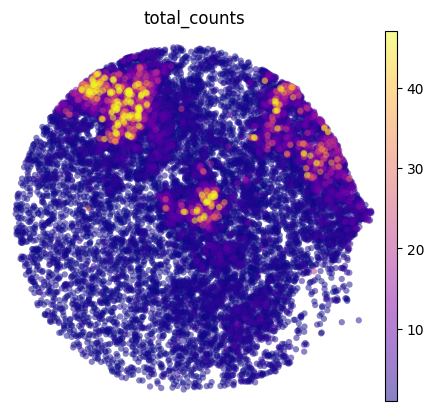

In [95]:
sc.pl.spatial(bac_df,color='total_counts',show=False,
                  spot_size=80,frameon=False,vmax='p99.3',
                  crop_coord=[300,5000,5000,300],alpha=.5,cmap='plasma')

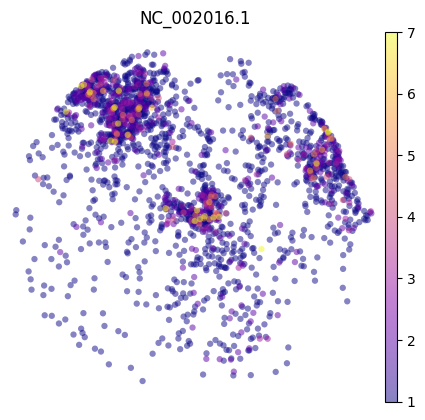

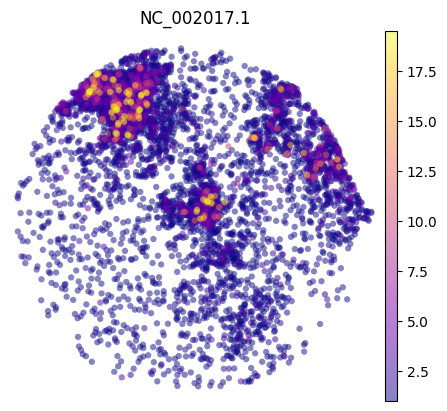

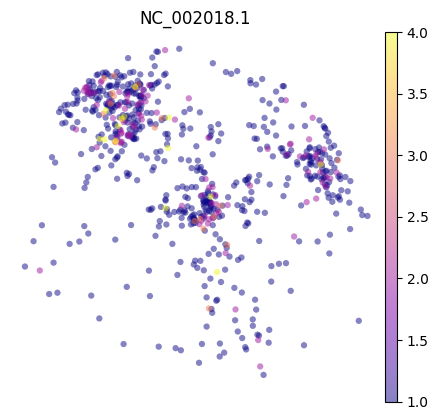

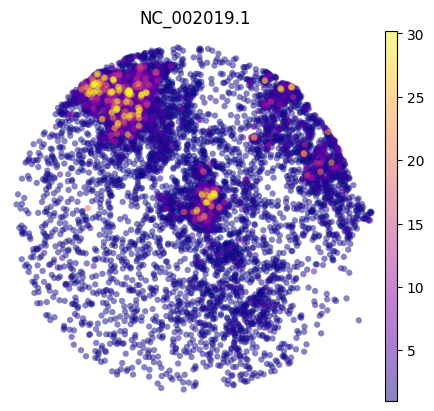

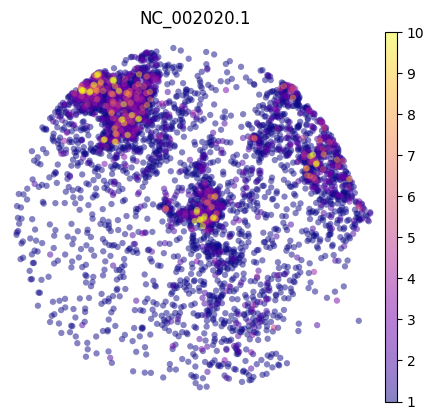

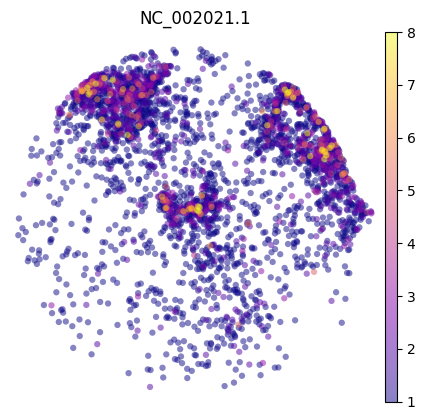

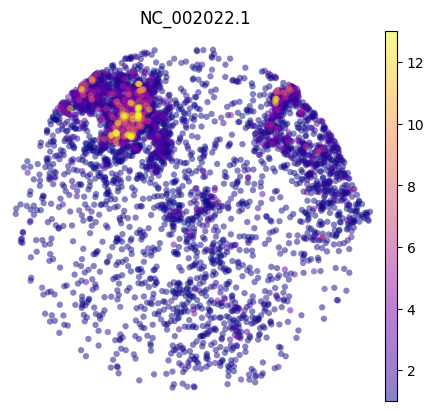

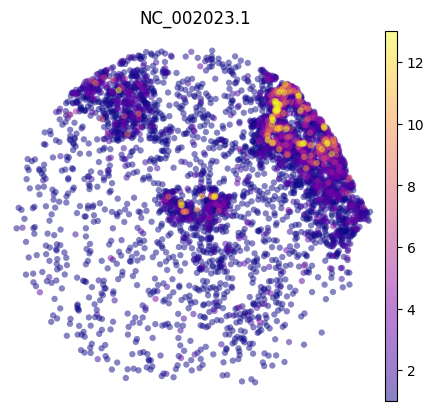

In [96]:
for gene in bac_df.var.index:
    sc.pl.spatial(bac_df[bac_df[:,gene].X>0],color=gene,spot_size=80,frameon=False,vmax='p99.3',
                  crop_coord=[300,5000,5000,300],alpha=.5,cmap='plasma')

In [97]:
bac_df.write_h5ad(f'{slideseq}/{fold}/adata_{puck}_flu.h5ad')